<a href="https://colab.research.google.com/github/Sakshi1007/MLnow_2.0/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/ColabNotebooks/Online Retail/Car_price'

/content/drive/MyDrive/ColabNotebooks/Online Retail/Car_price


In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
data=pd.DataFrame(pd.read_csv("1628185344854.csv"))

In [6]:
data.shape

(301, 9)

In [7]:
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [8]:
data.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [11]:
#We will drop car name as it is not significant in our preediction
data.drop(["Car_Name"],axis=1,inplace=True)

In [12]:
print(f'Fuel_Type: {data.Fuel_Type.unique()}')
print(f'Seller_Type: {data.Seller_Type.unique()}')
print(f'Transmission: {data.Transmission.unique()}')

Fuel_Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']


In [13]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
#Categorical to numerical coversion
data['Fuel_Type'] = data['Fuel_Type'].apply({'Petrol':1, 'Diesel':2,'CNG':3}.get)
data['Seller_Type'] = data['Seller_Type'].apply({'Dealer':0, 'Individual':1}.get)
data['Transmission'] = data['Transmission'].apply({'Manual':0, 'Automatic':1}.get)
data.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,1,0,0,0
1,2013,4.75,9.54,43000,2,0,0,0
2,2017,7.25,9.85,6900,1,0,0,0
3,2011,2.85,4.15,5200,1,0,0,0
4,2014,4.60,6.87,42450,2,0,0,0
5,2018,9.25,9.83,2071,2,0,0,0
6,2015,6.75,8.12,18796,1,0,0,0
7,2015,6.50,8.61,33429,2,0,0,0
8,2016,8.75,8.89,20273,2,0,0,0
9,2015,7.45,8.92,42367,2,0,0,0


***DATA VISUALIZATION***

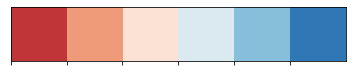

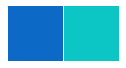

In [15]:
#To visualize our results 

import matplotlib.pyplot as plt
import seaborn as sns
sns.palplot(sns.color_palette("RdBu"))
pal = sns.color_palette('RdBu', 6)
pal.as_hex()
plt.style.use(['seaborn'])
sns_colors = ["#0c69c6", "#0cc6c6"]
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [16]:
data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

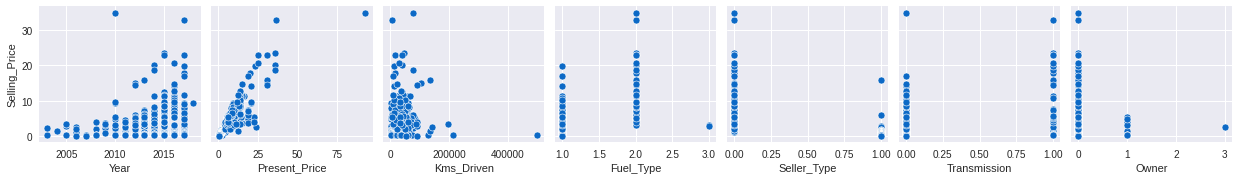

In [17]:
sns.pairplot(data,x_vars=['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner'],
             y_vars=['Selling_Price'],diag_kind='kde')

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
data.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,1,0,0,0
1,2013,4.75,9.54,43000,2,0,0,0
2,2017,7.25,9.85,6900,1,0,0,0
3,2011,2.85,4.15,5200,1,0,0,0
4,2014,4.60,6.87,42450,2,0,0,0
5,2018,9.25,9.83,2071,2,0,0,0
6,2015,6.75,8.12,18796,1,0,0,0
7,2015,6.50,8.61,33429,2,0,0,0
8,2016,8.75,8.89,20273,2,0,0,0
9,2015,7.45,8.92,42367,2,0,0,0


***DATA SPLIT***

In [ ]:
x=data.drop('Selling_Price',axis=1).values
y=data['Selling_Price'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8468053957655799

***Prediction***

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(y_pred)

[ 2.96670467  8.3025584   6.05620758 -1.46814968  9.25713882  7.032306
  1.35164871  0.8268692   1.37173108  7.10742891  8.74382695  0.58613312
  8.50347194  3.42803571  6.50183791  3.08701389  0.46323861 10.8959559
  1.76487652  2.36736645  0.37538646  7.73247978  6.2075281   2.64722707
  0.78232086  3.72073841  5.33393873  2.83824054  2.16090172  1.77220708
  0.37859447  8.79078642 -0.7007019   2.2988819   8.21516023  4.54037167
  7.35322104  7.6823757   2.91768184  8.08080852  3.99669454  4.34672417
  4.36388106  0.61018923  6.94478948  0.47281585  7.41596672 11.44059317
  3.14822313  4.95097368  6.86250813  2.19862524 20.53946595 16.79146986
  7.13952545  9.830903    4.49886186  8.62078376  1.810855    7.67299866
  0.21098592]


***Visualising Result***

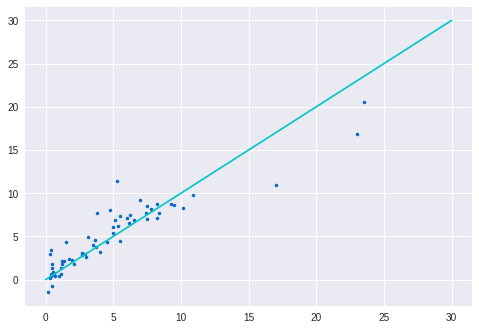

In [ ]:
plt.plot(y_test,y_pred,'.')
x=np.linspace(0,30,30)
y=x
plt.plot(x,y)
plt.show()